<a href="https://colab.research.google.com/github/khoaphamj1505/CS114.L11.KHCL/blob/master/Folio/Folio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_score


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
dir ='/content/gdrive/MyDrive/PythonML/Data/Folio%20Leaf%20Dataset.rar (Unzipped Files)/Folio Leaf Dataset/Folio'
categories =['beaumier du perou','eggplant','fruitcitere','guava','hibiscus','betel','rose','chrysanthemum','ficus','duranta gold','ashanti blood','bitter orange','coeur demoiselle','jackfruit',
'mulberry leaf','pimento','pomme jacquot','star apple','barbados cherry','sweet olive','croton','thevetia','vieux garcon','chocolate tree','caricature plant','coffee','ketembilla','chinese guava','lychee','geranium','sweet potato','papaya']

In [6]:
data=[]
for category in categories:
  path=os.path.join(dir,category)
  label=categories.index(category)

  for img in os.listdir(path):
    impath=os.path.join(path,img)
    folio=cv2.imread(impath,0)
    folio=cv2.resize(folio,(50,50))
    image=np.array(folio).flatten()
    data.append([np.array(image),np.array(label)])
  
print(len(data))


637


In [7]:
print(data)

[[array([243, 244, 243, ..., 192, 195, 199], dtype=uint8), array(0)], [array([233, 236, 238, ..., 179, 175, 180], dtype=uint8), array(0)], [array([236, 240, 238, ..., 165, 179, 180], dtype=uint8), array(0)], [array([239, 240, 240, ..., 195, 191, 196], dtype=uint8), array(0)], [array([241, 241, 240, ..., 197, 201, 199], dtype=uint8), array(0)], [array([240, 241, 243, ..., 189, 192, 191], dtype=uint8), array(0)], [array([225, 224, 221, ..., 161, 158, 163], dtype=uint8), array(0)], [array([235, 234, 234, ..., 180, 179, 181], dtype=uint8), array(0)], [array([234, 237, 233, ..., 169, 178, 176], dtype=uint8), array(0)], [array([240, 239, 241, ..., 181, 183, 182], dtype=uint8), array(0)], [array([240, 240, 240, ..., 227, 229, 232], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array(0)], [array([255, 255, 255, ..., 255, 

In [8]:
import random
random.shuffle(data)


In [9]:
features=[]
labels=[]

for feature, label in data:
  features.append(feature)
  labels.append(label)
  

In [10]:
print(features)
print(labels)

[array([204, 213, 210, ..., 143, 142, 143], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([245, 247, 245, ..., 193, 190, 192], dtype=uint8), array([239, 239, 240, ..., 211, 210, 210], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([252, 252, 255, ..., 205, 204, 205], dtype=uint8), array([250, 250, 249, ..., 219, 217, 219], dtype=uint8), array([233, 228, 232, ..., 213, 213, 211], dtype=uint8), array([230, 232, 232, ..., 167, 174, 172], dtype=uint8), array([254, 253, 255, ..., 226, 225, 226], dtype=uint8), array([181, 174, 183, ..., 242, 240, 238], dtype=uint8), array([234, 235, 234, ..., 182, 180, 182], dtype=uint8), array([235, 237, 237, ..., 169, 167, 169], dtype=uint8), array([254, 255, 255, ..., 229, 228, 228], dtype=uint8), array([242, 243, 243, ..., 194, 195, 193], dtype=uint8), array([250, 253, 253, ..., 223, 223, 224], dtype=uint8), array([234, 235, 238, ..., 192, 192, 194], dtype=uint8), array([226, 226, 226, ..., 187

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
     features,labels, test_size=0.3)

In [107]:
#train and test
knn = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6614583333333334


In [82]:
print(y_pred[30:40])
print(y_test[30:40])

[23 22  8 20  2 11 30 29 19  9]
[array(23), array(22), array(8), array(20), array(2), array(11), array(30), array(29), array(19), array(9)]


5


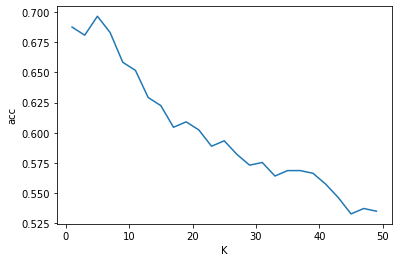

In [106]:
k_val=[i for i in range(1,50,2)]
k_acc_scores=[]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='brute')
  cv_scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='accuracy')
  k_acc_scores.append(cv_scores.mean())
k_max=k_val[k_acc_scores.index(max(k_acc_scores))]
print(format(k_max))
plt.plot(k_val,k_acc_scores)
plt.xlabel('K')
plt.ylabel('acc')
plt.show()
